In [1]:
import os
import numpy as np
from bitstring import Bits
import matplotlib.pyplot as plt

In [2]:
DATAPATH = "data"
data = []

print(os.listdir(DATAPATH))

['INL_ideal_SW_ideal_CDAC.csv', 'sine_4.4725M_mismatch_1.csv', 'spectrum_4.91M_4096.csv', 'sine_4.4725M_2048.csv', 'spectrum_12.49M_4096.csv', 'INL_TG_ideal_CDAC.csv', 'out (1).csv', 'spectrum_4.47M_4096.csv', 'INL_mismatch_3_noisy.csv', 'spectrum_4.47M_4096_conservative.csv', 'spectrum_6.01M_4096_conservative.csv', 'spectrum_9.47M_4096_conservative.csv', 'sine_2.33M_2048.csv', 'spectrum_17.47M_4096_conservative.csv', 'spectrum_2.31M_4096.csv', 'test.csv', 'INL_enhanced_TG_ideal_CDAC.csv', 'sine_2.33M_512.csv', 'spectrum_27.53M_4096_conservative.csv', 'sine_0.31M_mismatch_1.csv', 'spectrum_6.01M_4096.csv', 'spectrum_3.31M_4096.csv', 'spectrum_8.53M_4096.csv', 'spectrum_0.31M_4096_conservative.csv', 'INL_pismatch_1_noisy_unbalance.csv', 'sine_4.4725M_2048_liberal.csv', 'spectrum_1.31M_4096.csv', 'histogram.csv', 'INL_mismatch_1_noisy.csv', 'spectrum_0.31M_4096.csv', 'spectrum_3.81M_4096.csv', 'sine_0.2303M_mismatch_1.csv', 'spectrum_12.97M_4096_conservative.csv']


In [43]:
signal_freq = 0.31e6
file_name = "spectrum_0.31M_4096_conservative.csv"

with open(os.path.join(DATAPATH, file_name)) as f:
    data = f.readlines()

In [44]:
spectrum = np.zeros((len(data) - 1, 2))

for i in range(1, len(data)):
    temp = data[i].split(",")
    spectrum[i - 1, 0] = temp[0]
    spectrum[i - 1, 1] = temp[1]

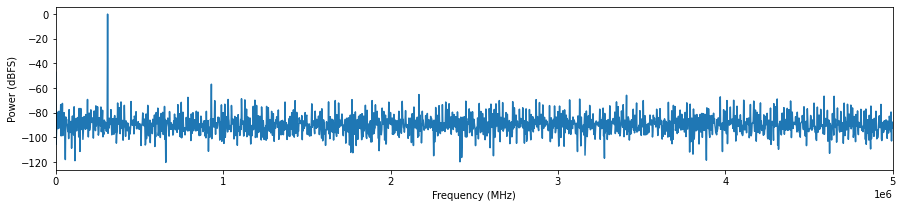

In [45]:
plt.ylabel("Power (dBFS)")
plt.xlabel("Frequency (MHz)")
plt.rcParams["figure.figsize"] = (15, 3)
plt.plot(spectrum[:,0], spectrum[:,1])
plt.xlim(0, 5e6)
plt.show()

In [46]:
freq_resolution = 2.5e3

sfdr = max(
    max(spectrum[1 : int(signal_freq / freq_resolution) - 1, 1]),
    max(spectrum[int(signal_freq / freq_resolution) + 2: , 1])
) * (-1)

total_noise_power = 0
total_signal_power = 0
# print(int(signal_freq / freq_resolution))
# print(spectrum[1780:1800])

for i in range(int(signal_freq / freq_resolution) - 2, int(signal_freq / freq_resolution) + 2):
    amplitude = 10 ** (spectrum[i, 1] / 20)
    total_signal_power += amplitude ** 2

for i in range(1, len(spectrum)):
    if((int(signal_freq / freq_resolution) - 2< i) and (int(signal_freq / freq_resolution) + 2 > i)):
        pass
    else:
        amplitude = 10 ** (spectrum[i, 1] / 20)
        total_noise_power += amplitude ** 2

snr = 10 * np.log10(total_signal_power / total_noise_power)
enob = (snr - 1.76) / 6.02

print("SFDR:    {:6.2f} dB".format(sfdr))
print("SNDR:    {:6.2f} dB".format(snr))
print("ENOB:    {:6.2f} Bit".format(enob))

SFDR:     56.81 dB
SNDR:     48.74 dB
ENOB:      7.80 Bit


# Comparator Test

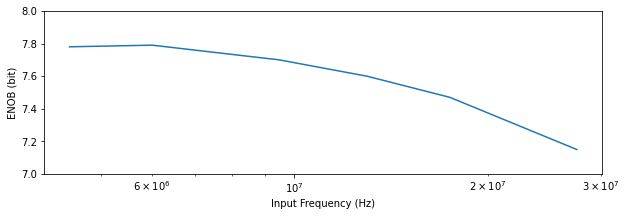

In [51]:
input_voltage = [4.47e6, 6.01e6, 9.47e6, 12.97e6, 17.47e6, 27.53e6]
compare_time = [7.78, 7.79, 7.70, 7.60, 7.47, 7.15]

plt.plot(input_voltage, compare_time)
plt.ylabel("ENOB (bit)")
plt.ylim(7,8)
plt.xlabel("Input Frequency (Hz)")
plt.rcParams["figure.figsize"] = (10, 3)
plt.xscale("log")
plt.show()
